In [75]:
using BioMedQuery
using BioMedQuery.UMLS
using BioMedQuery.Processes
using BioMedQuery.Entrez
using BioMedQuery.Entrez.DB
using MySQL
using DataFrames
using StatsBase
using PlotlyJS
using RCall
using AssociationRules
using Suppressor

In [87]:
@suppress begin
    include("./Desktop/Code/PubMedAsthma/Functions.jl")
end;

In [3]:
db_ped = mysql_connect("Jasons-MacBook-Air-2.local", "jasonk33", ENV["MYSQL_PSWD"], "pubmed_asthma_pediatric");

In [4]:
db_adult = mysql_connect("Jasons-MacBook-Air-2.local", "jasonk33", ENV["MYSQL_PSWD"], "pubmed_asthma_adult");

In [6]:
@suppress begin
    mesh_descrips_ped,semantics_ped,mesh_descrips_filtered_ped=get_mesh_semantics_filtered(db_ped);
    mesh_descrips_adult,semantics_adult,mesh_descrips_filtered_adult=get_mesh_semantics_filtered(db_adult);
    des_ind_dict_ped, disease_occurances_ped = umls_semantic_occurrences(db_ped, "Disease or Syndrome", "Mental or Behavioral Dysfunction", "Neoplastic Process");
    des_ind_dict_adult, disease_occurances_adult = umls_semantic_occurrences(db_adult, "Disease or Syndrome", "Mental or Behavioral Dysfunction", "Neoplastic Process");
    itemsets_ped = occurances_to_itemsets(des_ind_dict_ped, disease_occurances_ped);
    itemsets_adult = occurances_to_itemsets(des_ind_dict_adult, disease_occurances_adult);
end

Filter mesh query string : SELECT mesh FROM mesh2umls WHERE umls IN ( "Disease or Syndrome" , "Mental or Behavioral Dysfunction" , "Neoplastic Process" )
-------------------------------------------------------------
Found 24321 articles with valid descriptors
-------------------------------------------------------------
Filter mesh query string : SELECT mesh FROM mesh2umls WHERE umls IN ( "Disease or Syndrome" , "Mental or Behavioral Dysfunction" , "Neoplastic Process" )
-------------------------------------------------------------
Found 23513 articles with valid descriptors
-------------------------------------------------------------


 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in symbol(::String, ::Vararg{String,N}) at ./deprecated.jl:30
 in (::##2#4{DataArrays.DataArray{String,1}})(::Int64) at ./<missing>:0
 in collect(::Base.Generator{UnitRange{Int64},##2#4{DataArrays.DataArray{String,1}}}) at ./array.jl:307
 in occurances_to_itemsets(::Dict{String,Int64}, ::SparseMatrixCSC{Float64,Int64}) at ./In[5]:116
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/JasonKatz/.julia/v0.5/IJulia/src/execute_request.jl:160
 in invokelatest(::Function, ::ZMQ.Socket, ::Vararg{Any,N}) at /Users/JasonKatz/.julia/v0.5/Compat/src/Compat.jl:1488
 in eventloop(::ZMQ.Socket) at /Users/JasonKatz/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##13#19)() at ./task.jl:360
while loading In[6], in expression starting on line 5


In [9]:
mesh_descrips_ped

,count,mesh_descriptor,freq
1,48526,humans,0.9978619300193249
2,41303,asthma,0.9778791990460919
3,41150,child,0.8462645450433781
4,26149,male,0.5377246001397968
5,26019,female,0.535052012663953
6,21129,adolescent,0.43456272357222153
7,19981,"child, preschool",0.41087948686320463
8,11168,infant,0.2295958225401916
9,4618,risk factors,0.09497964721845319
10,4014,prevalence,0.08256239463837836


In [10]:
semantics_ped

,count,semantic_type,freq
1,71502,Disease or Syndrome,1.0
2,96794,Age Group,0.999794416348012
3,48526,Human,0.9978619300193249
4,29734,Organism Attribute,0.5583651987993915
5,29496,Population Group,0.5507586036758357
6,27136,Pharmacologic Substance,0.3820566588544879
7,24171,Research Activity,0.3538916985321327
8,23320,Quantitative Concept,0.29883639652974797
9,19700,Organic Chemical,0.2951358907939641
10,17381,Diagnostic Procedure,0.27589326096788785


In [11]:
mesh_descrips_adult

,count,mesh_descriptor,freq
1,23513,humans,1.0
2,39114,asthma,0.9765236252285969
3,19449,adult,0.8271594437119891
4,18006,male,0.7657891379237017
5,17769,female,0.7557096074511972
6,14018,middle aged,0.5961808361332029
7,6022,aged,0.2561136392633862
8,3549,forced expiratory volume,0.14706757963679667
9,2405,bronchial provocation tests,0.10062518606728194
10,2099,respiratory function tests,0.0881639943860843


In [12]:
semantics_adult

,count,semantic_type,freq
1,73397,Disease or Syndrome,1.0
2,23513,Human,1.0
3,35082,Age Group,0.9690809339514311
4,25095,Organism Attribute,0.81104070088887
5,18405,Population Group,0.7585165653042998
6,34267,Pharmacologic Substance,0.518266490877387
7,28676,Organic Chemical,0.4681240165015098
8,14397,Diagnostic Procedure,0.42095861863649897
9,11277,Research Activity,0.3398970782120529
10,9123,Quantitative Concept,0.251435376174882


In [58]:
plot(bar(x=mesh_descrips_ped[1:25,:mesh_descriptor], y=mesh_descrips_ped[1:25,:freq]))

In [59]:
plot(bar(x=semantics_ped[1:10,:semantic_type], y=semantics_ped[1:10,:freq]))

In [60]:
plot(bar(x=mesh_descrips_adult[1:25,:mesh_descriptor], y=mesh_descrips_adult[1:25,:freq]))

In [61]:
plot(bar(x=semantics_adult[1:10,:semantic_type], y=semantics_adult[1:10,:freq]))

In [19]:
mesh_descrips_filtered_ped

,count,mesh_descriptor,freq
1,41303,asthma,0.9778791990460919
2,1938,acute disease,0.03992434521606842
3,1880,chronic disease,0.03992434521606842
4,1225,"rhinitis, allergic, seasonal",0.031906582788536655
5,1126,bronchitis,0.031413182023765474
6,1269,"dermatitis, atopic",0.03108424818058468
7,1218,respiratory tract infections,0.03071419760700629
8,1162,"asthma, exercise-induced",0.028576127626331153
9,1199,bronchial hyperreactivity,0.028206077052752764
10,1042,"rhinitis, allergic, perennial",0.024464454586571274


In [20]:
mesh_descrips_filtered_adult

,count,mesh_descriptor,freq
1,39114,asthma,0.9765236252285969
2,2938,occupational diseases,0.07298090418066601
3,1309,chronic disease,0.0548207374643814
4,1700,bronchitis,0.0523114872623655
5,1520,bronchial hyperreactivity,0.040530770212223025
6,1542,"pulmonary disease, chronic obstructive",0.03627780376812827
7,786,acute disease,0.03342831625058478
8,1079,"lung diseases, obstructive",0.029898354101986137
9,888,"rhinitis, allergic, seasonal",0.02283842980478884
10,828,rhinitis,0.02177518819376515


In [22]:
association_rules_ped = apriori2(itemsets_ped, .01, .01, 2, 3, 0)

,lhs,rhs,support,confidence,lift,chi_squared
1,asthma,"asthma, exercise-induced",0.015377657168701944,0.015725518227305217,0.5503026313759571,98.35382627735888
2,"asthma, exercise-induced",asthma,0.015377657168701944,0.5381294964028777,0.5503026313759571,98.35382627735846
3,asthma,chronic disease,0.039718761564080426,0.04061724761384182,1.0173553853926334,0.5348873853059547
4,chronic disease,asthma,0.039718761564080426,0.9948506694129763,1.0173553853926331,0.5348873853059417
5,asthma,"dermatitis, atopic",0.031002014719789483,0.0317033174956902,1.0199158529268273,0.4241386780227097
6,"dermatitis, atopic",asthma,0.031002014719789483,0.9973544973544973,1.019915852926827,0.42413867802270105
7,asthma,bronchitis,0.031289831832572675,0.03199764537694992,1.0186056717445013,0.3776879270760947
8,bronchitis,asthma,0.031289831832572675,0.9960732984293194,1.0186056717445013,0.377687927076094
9,asthma,bronchial hyperreactivity,0.027095925332017597,0.027708867678593953,0.9823722606575561,0.26274322361615005
10,bronchial hyperreactivity,asthma,0.027095925332017597,0.9606413994169096,0.9823722606575562,0.2627432236161465


In [82]:
@suppress_err begin
    association_rules_adult = apriori2(itemsets_adult, .01, .01, 2, 3, 0)
end

,lhs,rhs,support,confidence,lift,chi_squared
1,"chronic disease,asthma",bronchitis,0.019478586313953983,0.35642023346303503,6.813421910094587,49.392766856912104
2,"bronchitis,asthma",chronic disease,0.019478586313953983,0.3729641693811075,6.803340973357626,49.298995647814905
3,bronchitis,chronic disease,0.019478586313953983,0.3723577235772358,6.792278630311516,49.195627889526016
4,chronic disease,bronchitis,0.019478586313953983,0.35531419705197825,6.7922786303115155,49.195627889526016
5,bronchitis,asthma,0.0522264279334836,0.9983739837398374,1.0223756578404597,1.411669928807167
6,asthma,bronchitis,0.0522264279334836,0.05348199120247376,1.0223756578404597,1.4116699288071577
7,chronic disease,asthma,0.05465061880661762,0.9968968192397207,1.0208629811760617,1.349392431344686
8,asthma,chronic disease,0.05465061880661762,0.05596446147815862,1.0208629811760617,1.3493924313446841
9,occupational diseases,asthma,0.07200272189852422,0.9865967365967366,1.0103152766690942,0.5899171198160348
10,asthma,occupational diseases,0.07200272189852422,0.07373372239885022,1.010315276669094,0.5899171198160135


In [25]:
folds=[]
for i in join(semantics_ped, semantics_adult, on = :semantic_type)[2]
    fold = semantic_fold(semantics_ped, semantics_adult,i,false)
    push!(folds,fold)
end
string(round(mean(folds.<2),2)*100,"% of the semantic types had frequencies within two folds of each other")

"80.0% of the semantic types had frequencies within two folds of each other"

In [27]:
isequal(sort(semantics_ped[1:5,2]),sort(semantics_adult[1:5,2]))

true

In [28]:
semantics_ped[1:5,2]

5-element DataArrays.DataArray{Any,1}:
 "Disease or Syndrome"
 "Age Group"          
 "Human"              
 "Organism Attribute" 
 "Population Group"   

In [30]:
for i in ["Family Group","Environmental Effect of Humans","Conceptual Entity","Organization","Regulation or Law"]
    println(semantic_fold(semantics_ped, semantics_adult,i)," is the fold difference")
end

The term Family Group is associated more with pediatric asthma
14.53 is the fold difference
The term Environmental Effect of Humans is associated more with pediatric asthma
4.31 is the fold difference
The term Conceptual Entity is associated more with pediatric asthma
3.14 is the fold difference
The term Organization is associated more with pediatric asthma
2.07 is the fold difference
The term Regulation or Law is associated more with pediatric asthma
1.86 is the fold difference


In [32]:
for i in ["Anatomical Abnormality","Organophosphorus Compound","Body Substance","Cell Function","Neoplastic Process"]
    try println(semantic_fold(semantics_ped, semantics_adult,i)," is the fold difference")
    catch
        println("The term $i is not in the semantic data sets")
    end
end

The term Anatomical Abnormality is associated more with adult asthma
1.71 is the fold difference
The term Organophosphorus Compound is not in the semantic data sets
The term Body Substance is associated more with adult asthma
2.52 is the fold difference
The term Cell Function is associated more with adult asthma
2.2 is the fold difference
The term Neoplastic Process is associated more with adult asthma
2.76 is the fold difference


In [34]:
mesh_descrips_filtered_ped[mesh_descrips_filtered_ped[:freq] .> .02,:]

,count,mesh_descriptor,freq
1,41303,asthma,0.9778791990460919
2,1938,acute disease,0.03992434521606842
3,1880,chronic disease,0.03992434521606842
4,1225,"rhinitis, allergic, seasonal",0.031906582788536655
5,1126,bronchitis,0.031413182023765474
6,1269,"dermatitis, atopic",0.03108424818058468
7,1218,respiratory tract infections,0.03071419760700629
8,1162,"asthma, exercise-induced",0.028576127626331153
9,1199,bronchial hyperreactivity,0.028206077052752764
10,1042,"rhinitis, allergic, perennial",0.024464454586571274


In [35]:
mesh_descrips_filtered_adult[mesh_descrips_filtered_adult[:freq] .> .02,:]

,count,mesh_descriptor,freq
1,39114,asthma,0.9765236252285969
2,2938,occupational diseases,0.07298090418066601
3,1309,chronic disease,0.0548207374643814
4,1700,bronchitis,0.0523114872623655
5,1520,bronchial hyperreactivity,0.040530770212223025
6,1542,"pulmonary disease, chronic obstructive",0.03627780376812827
7,786,acute disease,0.03342831625058478
8,1079,"lung diseases, obstructive",0.029898354101986137
9,888,"rhinitis, allergic, seasonal",0.02283842980478884
10,828,rhinitis,0.02177518819376515


In [37]:
mesh_fold(mesh_descrips_filtered_ped,mesh_descrips_filtered_adult)[1]

,mesh_descriptor,fold_ped
1,"bronchiolitis, viral",77.34221454709922
2,respiratory syncytial virus infections,16.6109983515929
3,virus diseases,10.634554500226143
4,bronchiolitis,10.074841105477397
5,"diabetes mellitus, type 1",9.264952784287926
6,cystic fibrosis,7.197122742577289
7,"dermatitis, atopic",6.35551241278337
8,eczema,6.174193831742864


In [38]:
mesh_fold(mesh_descrips_filtered_ped,mesh_descrips_filtered_adult)[2]

,mesh_descriptor,fold_adult
1,occupational diseases,45.51201463020456
2,"pulmonary disease, chronic obstructive",28.46169243369831
3,nasal polyps,16.12390892647622
4,churg-strauss syndrome,9.900340844882162
5,lung neoplasms,9.065895962433798
6,"lung diseases, obstructive",7.574561147025051
7,hypertension,7.18144126957124
8,pulmonary emphysema,6.315889082635138
9,"aspergillosis, allergic bronchopulmonary",5.689001828775571


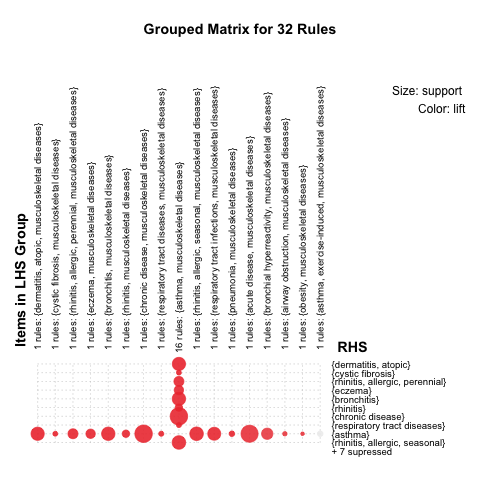

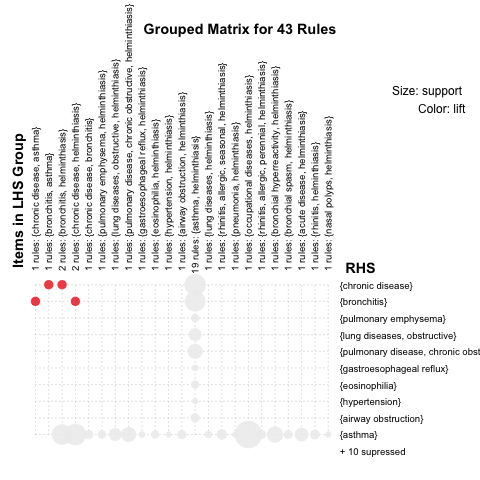

RCall.RObject{RCall.StrSxp}
character(0)


In [83]:
@suppress_err begin
    arules_viz(itemsets_ped)
    arules_viz(itemsets_adult)
end

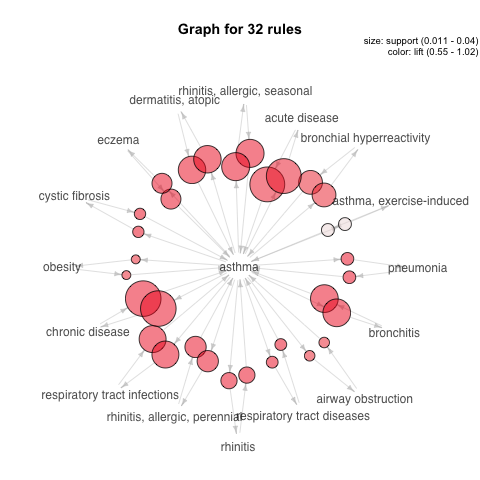

In [85]:
@suppress_err begin
    arules_viz(itemsets_ped, "graph")
end;

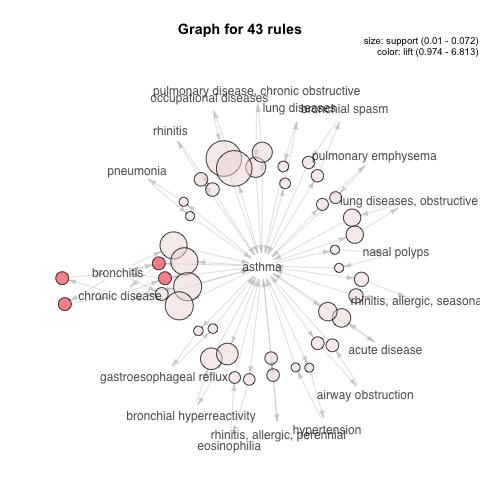

In [86]:
@suppress_err begin
    arules_viz(itemsets_adult, "graph")
end;

In [43]:
mysql_disconnect(db_ped)
mysql_disconnect(db_adult)